<a href="https://colab.research.google.com/github/Vmjkom/Projektit/blob/master/BoW_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!wget -nc http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-dev.tsv
!wget -nc http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-test.tsv
!wget -nc http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-train.tsv

File ‘fincore-dev.tsv’ already there; not retrieving.

File ‘fincore-test.tsv’ already there; not retrieving.

File ‘fincore-train.tsv’ already there; not retrieving.



,Labels,Text
2338,PB NA,26 July 2013 Lukumaraton : my 14 -hour readin...
4169,MT OS RV OP,Mielipide SIEMENS SN25E202EU :sta Sen käyttäj...
567,RV OP,Every Picture Tells A Story Kirjassa The 500 ...
1764,DF ID,Vanha pappa Aerts veti kyllä sympatiapisteet ...
3039,DS IG,Hotellin kartta Ilallinen Start your day with...


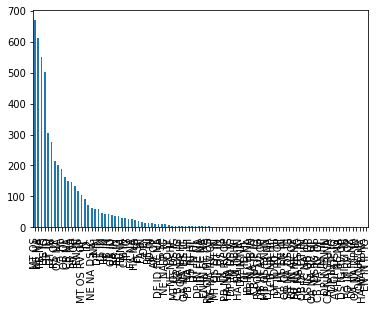

In [32]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

train_df = pd.read_csv('/content/fincore-train.tsv',delimiter = '\t',names=['Labels', 'Text'])
train_df = shuffle(train_df)

dev_df = pd.read_csv('/content/fincore-dev.tsv',delimiter = '\t',names=['Labels', 'Text'])
dev_df = shuffle(dev_df)

test_df = pd.read_csv('/content/fincore-test.tsv',delimiter = '\t',names=['Labels', 'Text'])
test_df = shuffle(test_df)

train_df.Labels.value_counts().plot(kind='bar');
train_df.head()


In [0]:
import string

def clean_label(label):
  label = label.strip()
  label = label[-2:]
  return label

def clean_text(text):
  text = text.lower()
  text = text.strip()
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

     Labels                                               Text
2338     NA  26 july 2013 lukumaraton  my 14 hour reading b...
4169     OP  mielipide siemens sn25e202eu sta sen käyttäjät...
567      OP  every picture tells a story kirjassa the 500 g...
1764     ID  vanha pappa aerts veti kyllä sympatiapisteet k...
3039     IG  hotellin kartta ilallinen start your day with ...
    Labels                                               Text
664     NA  hallitus aikoo käynnistää ensi vuonna laajan t...
424     IN  vaikka useimmat lait on kirjoitettu ennen nett...
233     ID  hannan antamassa linkissä kerrotaan  että kuva...
248     OS  käyttäjän tiedot silloin  kun se tulee käsinte...
374     OP  vastaus tähän keskusteluun täälä myös kupariki...


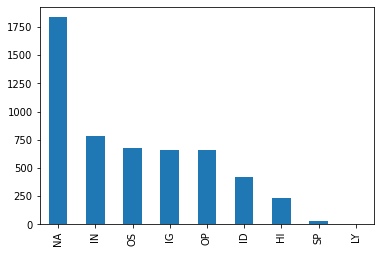

In [34]:
train_df['Labels'] = train_df['Labels'].apply(clean_label)
train_df['Text'] = train_df['Text'].apply(clean_text)

train_df.head()

dev_df['Labels'] = dev_df['Labels'].apply(clean_label)
dev_df['Text'] = dev_df['Text'].apply(clean_text)

dev_df.head()

test_df['Labels'] = test_df['Labels'].apply(clean_label)

train_df.Labels.value_counts().plot(kind='bar');
print(train_df.head())
print(dev_df.head())





In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


tfidf = TfidfVectorizer(sublinear_tf=True,ngram_range=(1,2))
label_encoder=LabelEncoder()

train_features = tfidf.fit_transform(train_df.Text)
train_labels = label_encoder.fit_transform(train_df.Labels)

dev_features = tfidf.transform(dev_df.Text)
dev_labels = label_encoder.transform(dev_df.Labels)

print(train_features.shape)
print("class labels",label_encoder.classes_)



(5295, 2466617)
class labels ['HI' 'ID' 'IG' 'IN' 'LY' 'NA' 'OP' 'OS' 'SP']


In [0]:
import keras
from keras.models import Sequential
from keras import layers

input_dim = train_features.shape[1]
class_count = len(label_encoder.classes_)

model=Sequential()
model.add(layers.Dense(100,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(class_count,activation='softmax'))



In [37]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'] )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               246661800 
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 909       
Total params: 246,662,709
Trainable params: 246,662,709
Non-trainable params: 0
_________________________________________________________________


In [38]:
history=model.fit(train_features,train_labels,epochs=5,batch_size=50,validation_data=(dev_features,dev_labels))

Train on 5295 samples, validate on 756 samples
Epoch 1/5
5295/5295 [==============================] - 83s 16ms/step - loss: 1.5999 - accuracy: 0.4967 - val_loss: 1.1044 - val_accuracy: 0.5847
Epoch 2/5
5295/5295 [==============================] - 79s 15ms/step - loss: 0.3317 - accuracy: 0.9673 - val_loss: 0.9196 - val_accuracy: 0.7037
Epoch 3/5
5295/5295 [==============================] - 78s 15ms/step - loss: 0.0398 - accuracy: 0.9951 - val_loss: 0.9108 - val_accuracy: 0.6971
Epoch 4/5
5295/5295 [==============================] - 76s 14ms/step - loss: 0.0148 - accuracy: 0.9975 - val_loss: 0.9075 - val_accuracy: 0.7037
Epoch 5/5
5295/5295 [==============================] - 74s 14ms/step - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.9147 - val_accuracy: 0.7011
